# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Dataset ini berisi data pasien yang semuanya menderita penyakit yang sama. Selama pengobatan mereka,
setiap pasien menanggapi salah satu dari 5 obat, yaitu obat A, obat B, obat C, obat X, dan obat Y.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees)
bertujuan untuk menganalisis dan untuk mengetahui obat mana yang mungkin sesuai untuk pasien di masa
depan dengan penyakit yang sama. Dengan adanya model ini diharapkan dapat merekomendasikan obat
untuk pasien baru dengan penyakit yang sama.

In [ ]:
Data Understanding

Dataset ini terdiri dari 6 kolom yang berisi 1 kolom float64, 1 kolom int64 dan 4 kolom objek.
Berikut atribut-atributnya :

0. Age = umur pasien (int64)
1. Sex = jenis kelamin pasien (objek) 
2. BP = tingkat tekanan darah (objek) 
3. Cholesterol = kolesterol (objek) 
4. Na_to_K = kandungan sodium dan kalium dalam obat (float64)
5. Drug = jenis obat (objek) 

In [ ]:
Data Preparation

Untuk fitur, data yang digunakan yaitu: 
1. Age
2. Sex
3. BP
4. Cholesterol
5. Na_to_K

Sedangkan, yang menjadi target yaitu Drug

In [ ]:
Modeling

Model yang digunakan yaitu Decision Tree Classifier atau pohon keputusan

In [ ]:
Evaluation

Evaluasi dilakukan dengan menguji model yang telah dipilih apakah sesuai dengan dataset yang
digunakan atau tidak. Evaluasi juga dilakukan dengan cara menguji data testing dengan data 
training.

In [ ]:
Deployment

Deployment dilakukan dengan menggunakan GitHub sebagai tempat menyimpan source code yang telah
dibuat dan Streamlit Share untuk mengaplikasikan source code yang telah diunggah di GitHub

# Import library

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("drug200.csv")

In [11]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [13]:
ind_col = [col for col in df.columns != 'Drug']
def_col = 'Drug'

# Transformasi Data

In [14]:
# memisahkan numerik dan kategori
numerik = []
kategori = []

for col in df.columns:
    if df[col].dtype == 'float64':
        numerik.append(col)
    elif df[col].dtype == 'int64':
        numerik.append(col)
    else:
        kategori.append(col)

for col in df.columns:
    if col in numerik:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
numerik

['Age', 'Na_to_K']

In [16]:
kategori

['Sex', 'BP', 'Cholesterol', 'Drug']

In [17]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in kategori:
    df[col] = le.fit_transform(df[col])

In [19]:
df['Drug'] = le.fit_transform(df['Drug'])

In [20]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [21]:
df.to_csv('drug.csv')

In [22]:
df['Drug'].value_counts()

Drug
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64

# Split data

In [23]:
X = df.drop(columns=['Drug'], axis=1)
Y = df['Drug']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [8]:
print(X.shape, x_train.shape, x_test.shape)

(200, 5) (160, 5) (40, 5)


# Membuat model training

In [25]:
pohon = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

In [26]:
model = pohon.fit(x_train, y_train)

# Evaluasi model

In [27]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [28]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  1.0


In [29]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [30]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  1.0


# Visualisasi Data

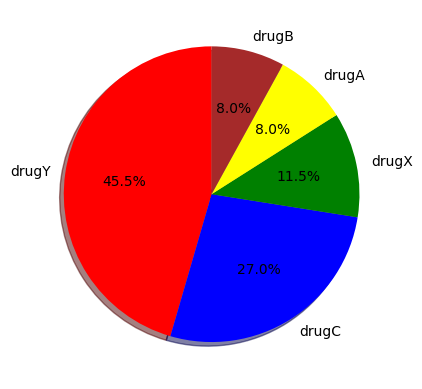

In [31]:
labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
values = df['Drug'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'blue','green','yellow','brown']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

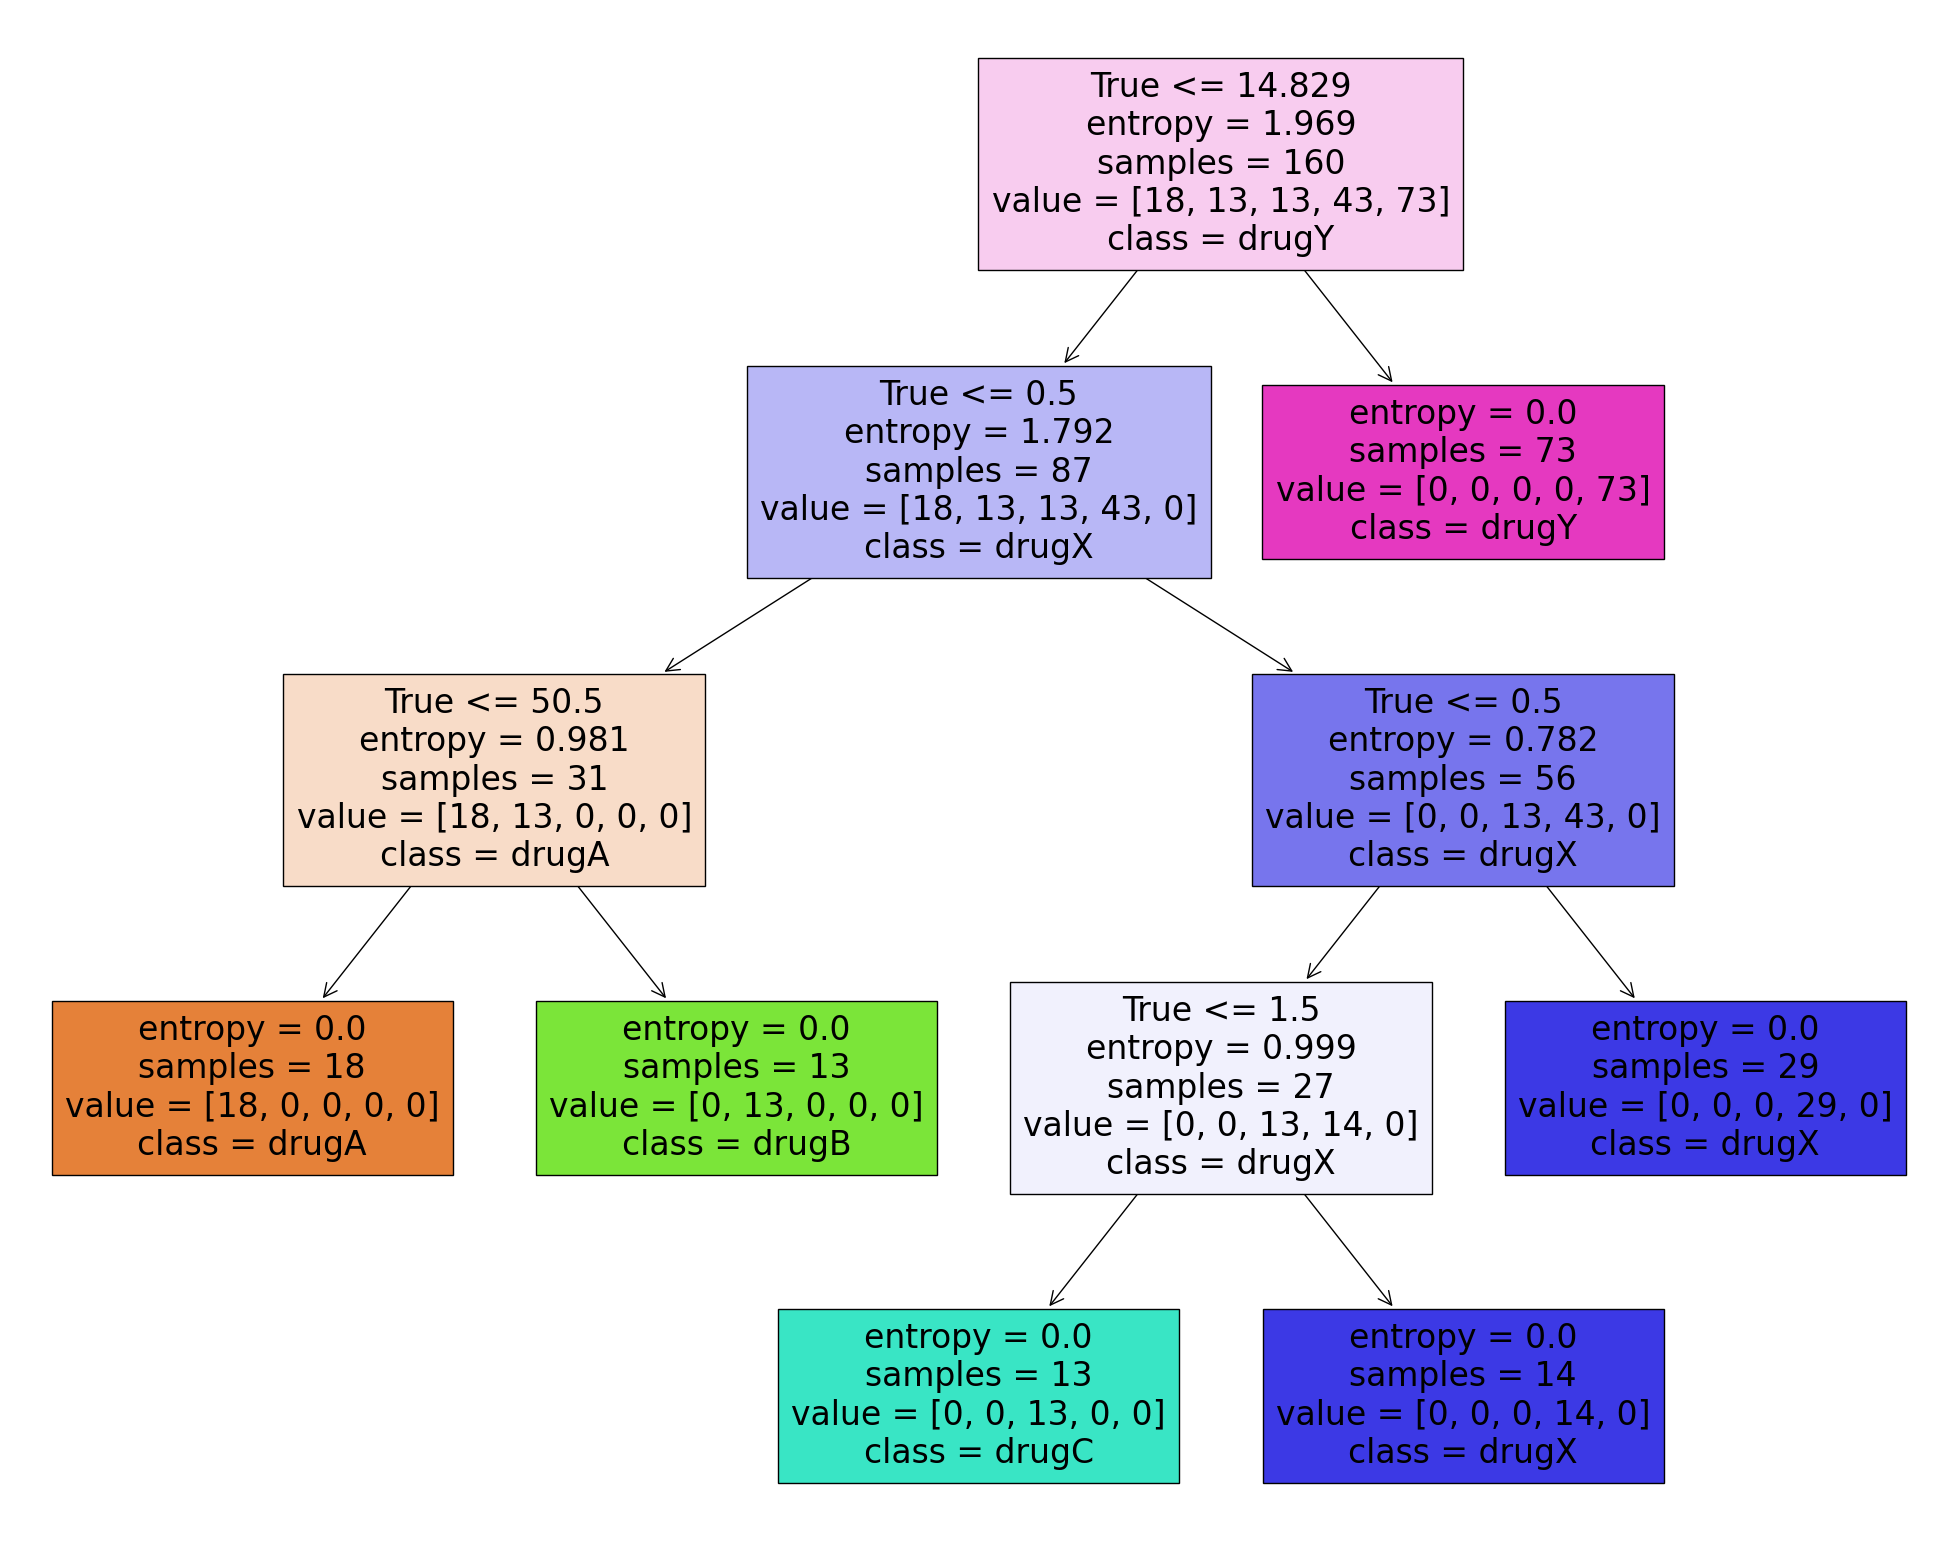

In [32]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(
    model,
    feature_names = ind_col,
    class_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],
    filled = True)

# Model Prediksi

In [40]:
input_data = (28, 0, 2, 0, 7.798)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('Obat yang disarankan adalah obat A')
elif(prediksi == 1):
    print('Obat yang disarankan adalah obat B')
elif(prediksi == 2):
    print('Obat yang disarankan adalah obat C')
elif(prediksi == 3):
    print('Obat yang disarankan adalah obat X')
else:
    print('Obat yang disarankan adalah obat Y')

[3]
Obat yang disarankan adalah obat X


c:\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Save Model

In [41]:
import pickle

filename = 'obat.sav'
pickle.dump(model, open(filename, 'wb'))